## **TO EXPLORE BUSINESS ANALYTICS TASK-5**

You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit. 

What all business problems you can derive by looking into the
data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Checking The Data Types

In [4]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
data.shape

(9994, 13)

Checking the numerical columns

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Checking the missing values
data.isnull().values.any()

False

In [8]:
# Dropping irrelevant columns
data = data.drop(['Country','Postal Code'],axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# Checking the unique columns of the terms
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Dropping the rows containing duplicate data



In [12]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape

(50, 11)

In [13]:
data.count()

Ship Mode       9994
Segment         9994
City            9994
State           9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [14]:
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
data.count()

Ship Mode       9944
Segment         9944
City            9944
State           9944
Region          9944
Category        9944
Sub-Category    9944
Sales           9944
Quantity        9944
Discount        9944
Profit          9944
dtype: int64

Visualizing the data with scatterplot and boxplot

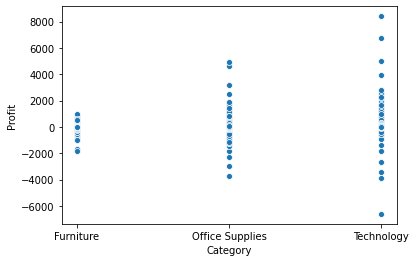

In [16]:
sns.scatterplot(x=data['Category'],y=data['Profit'])

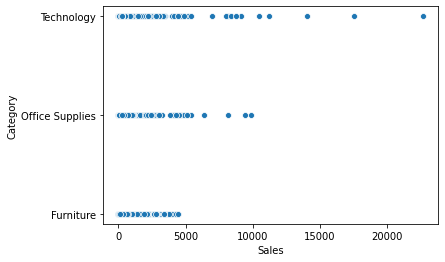

In [18]:
sns.scatterplot(x=data['Sales'],y=data['Category'])

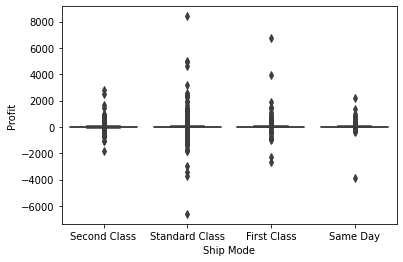

In [19]:
sns.boxplot(x=data['Ship Mode'],y=data['Profit'])

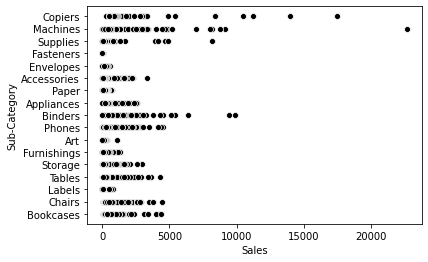

In [20]:
sns.scatterplot(x=data['Sales'],y=data['Sub-Category'],color=['black'])

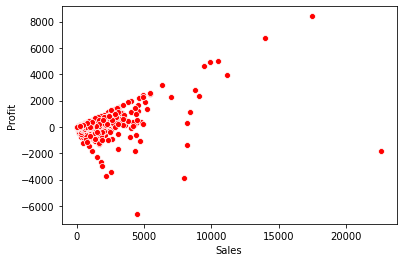

In [21]:
sns.scatterplot(x=data['Sales'],y=data['Profit'],color=['red'])

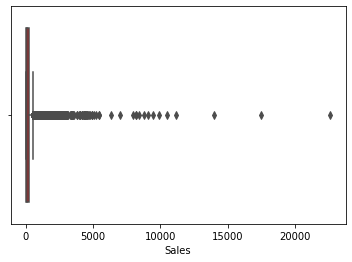

In [22]:
sns.boxplot(x=data['Sales'],color='r',saturation=1)

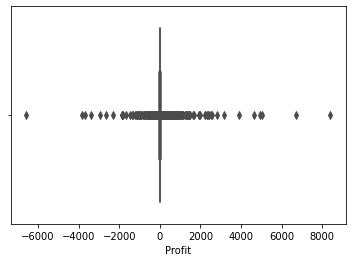

In [23]:
sns.boxplot(x=data['Profit'],color='red')

Removing the outliers


In [24]:
Q1 = data.quantile(q=0.25)
Q2 = data.quantile(q=0.75)
IQR = Q2-Q1
print(IQR)

Sales       192.7640
Quantity      3.0000
Discount      0.2000
Profit       27.8099
dtype: float64


In [25]:
data = data[~((data < (Q1-1.5*IQR)) | (data > (Q2+1.5*IQR))).any(axis=1)]
data.shape

(7102, 11)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


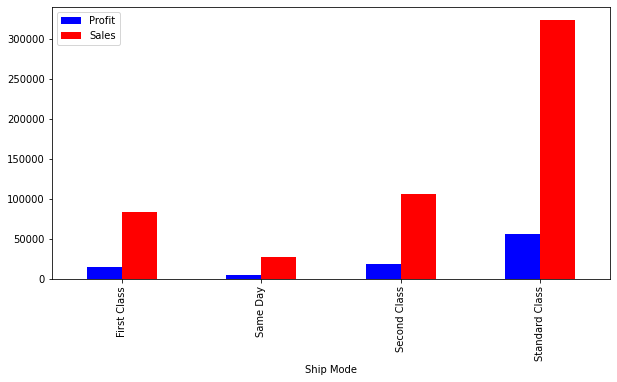

In [26]:
# Relation path between Profit and Sales
data.groupby('Ship Mode').sum()[['Profit','Sales']].plot.bar(figsize=(10,5),color='BrBG_r')

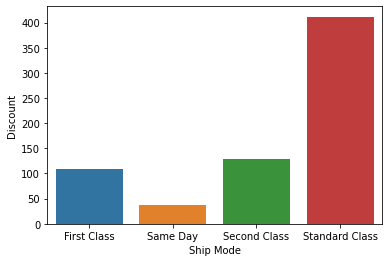

In [27]:
new = data.groupby(['Ship Mode'], as_index = False)['Discount'].sum()
sns.barplot(new['Ship Mode'], new['Discount'])

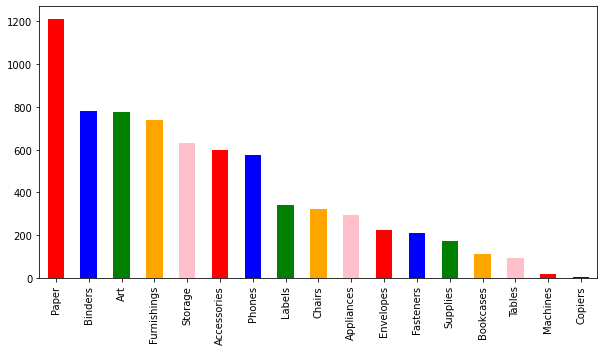

In [28]:
# Bar chart showing bifurcation of all the sub-categories
data['Sub-Category'].value_counts().plot.bar(figsize=(10,5),color=['r','b','g','orange','pink'])

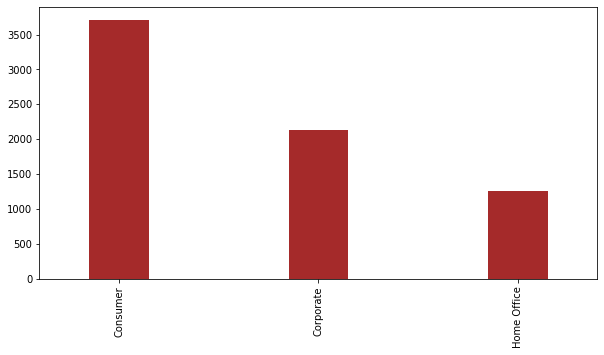

In [29]:
# Pie chart showing bifurcation of all the Segments
data['Segment'].value_counts().plot.bar(figsize=(10,5),color=['brown'],width=0.3)

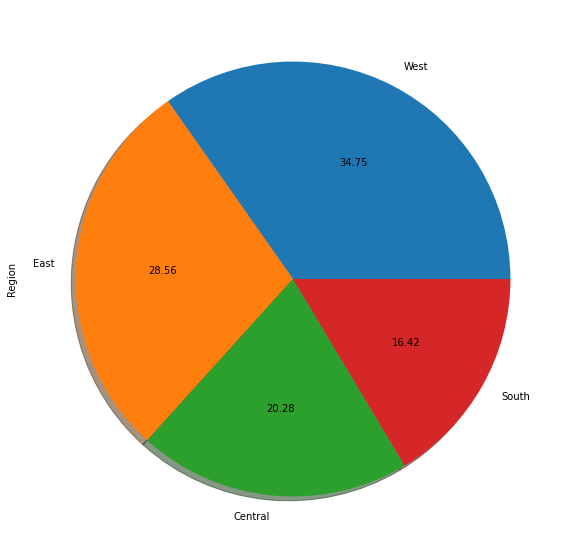

In [30]:
# Pie chart showing bifurcation of all the Regions
data['Region'].value_counts().plot.pie(autopct = '%.2f',shadow=True,figsize=(16,10))

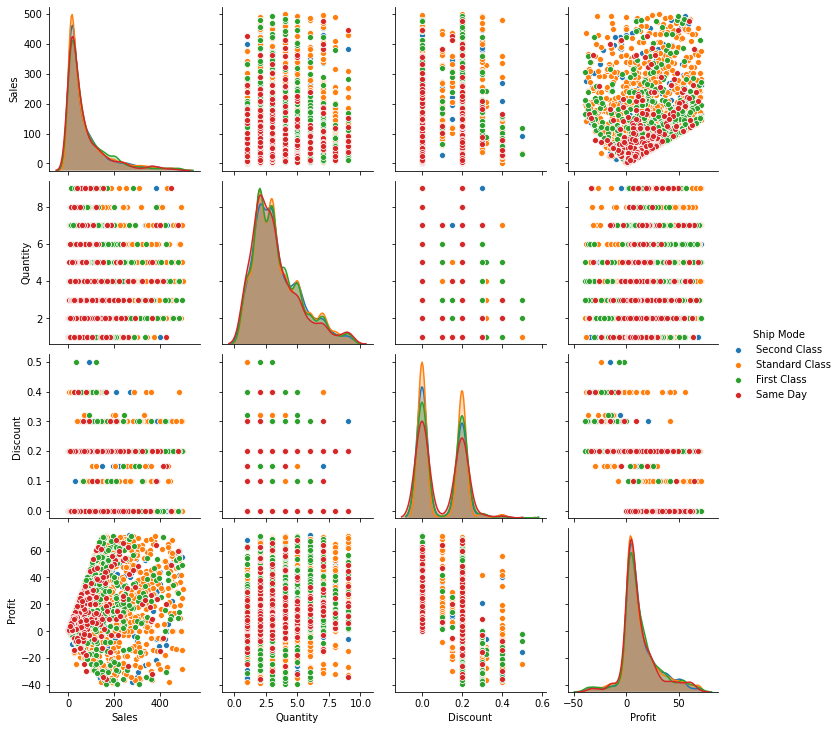

In [31]:
sns.pairplot(data,hue='Ship Mode')

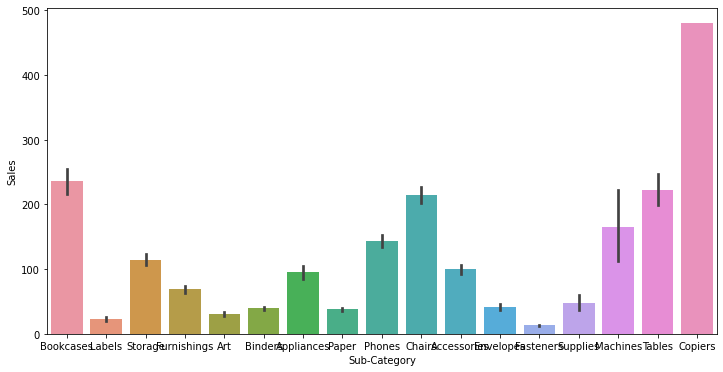

In [32]:
fig= plt.figure(figsize=(12,6))
sns.barplot(data['Sub-Category'],data['Sales'])

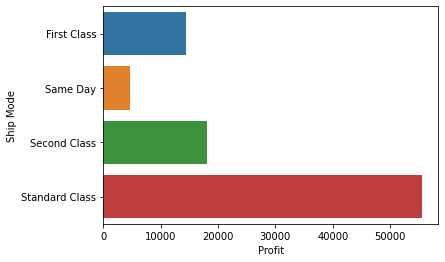

In [33]:
ax = data.groupby(['Ship Mode'],as_index=False).sum()
sns.barplot(ax['Profit'],ax['Ship Mode'])

In [34]:
data.groupby(['Segment'],as_index=False).sum()

,Segment,Sales,Quantity,Discount,Profit
0,Consumer,288795.2211,12639,361.45,48127.8274
1,Corporate,161650.3212,7313,211.66,27754.8007
2,Home Office,90061.9794,4270,114.57,17021.0488


In [35]:
data.groupby(['Ship Mode'],as_index=False).sum()

,Ship Mode,Sales,Quantity,Discount,Profit
0,First Class,83786.1839,3687,109.69,14496.4565
1,Same Day,27455.5770,1249,37.40,4672.3736
2,Second Class,105614.9149,4747,129.02,18162.5242
3,Standard Class,323650.8459,14539,411.57,55572.3226


In [36]:
data.groupby(['City'],as_index=False).sum()

,City,Sales,Quantity,Discount,Profit
0,Aberdeen,25.500,3,0.0,6.6300
1,Akron,675.216,38,2.0,106.3911
2,Albuquerque,866.120,42,0.8,199.8294
3,Alexandria,1007.950,52,0.0,166.1381
4,Allen,281.422,9,0.7,-26.2623
...,...,...,...,...,...
503,Woonsocket,195.550,15,0.0,78.6791
504,Yonkers,534.334,29,0.6,212.8951
505,York,487.642,5,0.5,5.6860
506,Yucaipa,50.800,5,0.0,13.2080


In [37]:
p = data.corr()
p

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.127817,0.135748,0.400982
Quantity,0.127817,1.000000,-0.027540,0.228772
Discount,0.135748,-0.027540,1.000000,-0.311481
Profit,0.400982,0.228772,-0.311481,1.000000


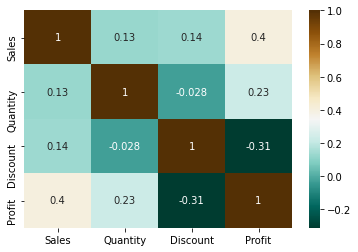

In [38]:
#Correlation of Sales, Quantity, Discount and Profit
sns.heatmap(p,cmap='BrBG_r',annot=True)

Text(0, 0.5, 'Values')

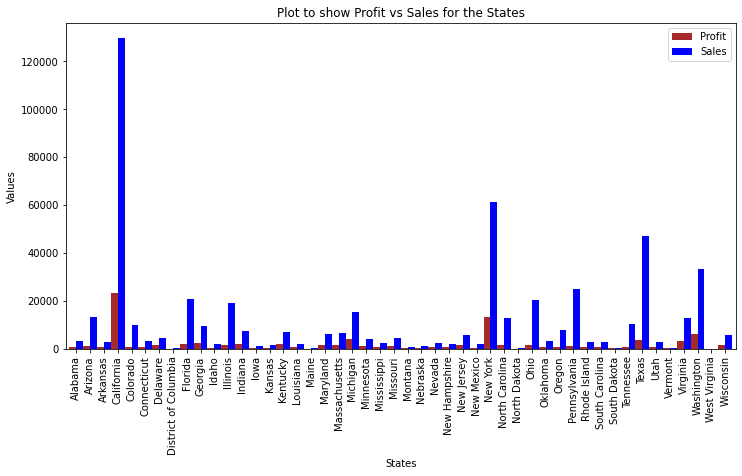

In [39]:
fig,ax = plt.subplots()
data1 = data.groupby(['State']).sum()[['Profit','Sales']].plot.bar(ax=ax,legend=True,figsize=(12,6),width=1.0,color=['brown','blue'])
plt.title('Plot to show Profit vs Sales for the States')
plt.xlabel("States")
plt.ylabel('Values')

In [40]:
data.groupby(['State']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True)


,Profit,Sales
State,,
West Virginia,43.4336,88.6400
North Dakota,60.9599,193.6500
Maine,93.7338,317.5200
District of Columbia,94.1444,217.5700
South Dakota,149.8321,509.2700
Montana,153.2307,757.9580
Vermont,157.6777,407.2900
Idaho,314.6232,2202.3160
Kansas,381.3975,1684.0900


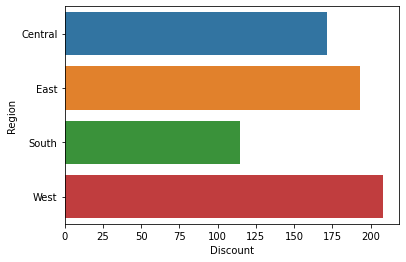

In [41]:
ax = data.groupby(['Region'],as_index=False).sum()
sns.barplot(ax['Discount'],ax['Region'])

In [42]:
data.groupby(['Region']).sum()[['Profit','Sales']].sort_values(by=["Profit"])

,Profit,Sales
Region,,
South,15861.1758,86886.8560
Central,17432.9569,111355.1762
East,24910.9504,138598.2420
West,34698.5938,203667.2475


Text(0, 0.5, 'Profit')

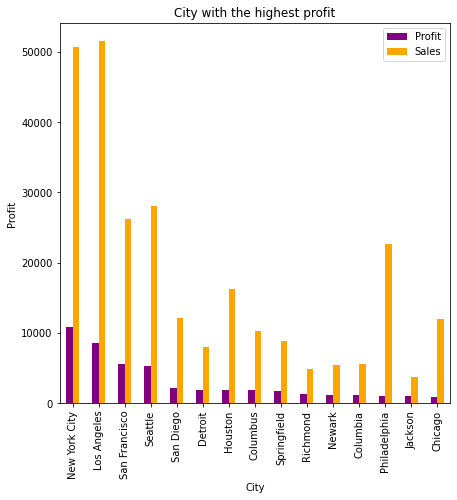

In [43]:
data.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=False).head(15).plot.bar(figsize=(7,7),color=['purple','orange'])
plt.title('City with the highest profit')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

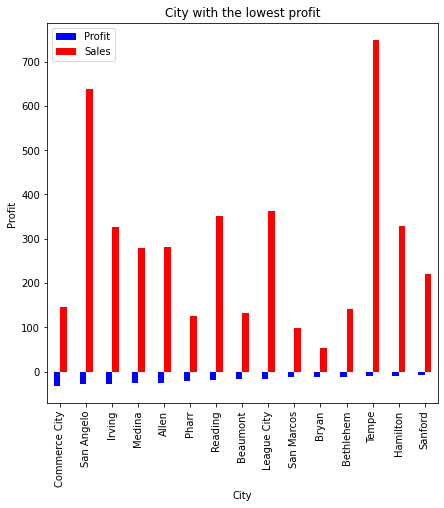

In [44]:
data.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True).head(15).plot.bar(figsize=(7,7),color= ['blue','red'])
plt.title('City with the lowest profit')
plt.ylabel('Profit')

In [45]:
d = data.groupby(['Region']).sum()[['Profit','Discount']].sort_values(by=['Discount'],ascending=True)
d

,Profit,Discount
Region,,
South,15861.1758,114.70
Central,17432.9569,171.68
East,24910.9504,193.00
West,34698.5938,208.30


Calculating marginal profit

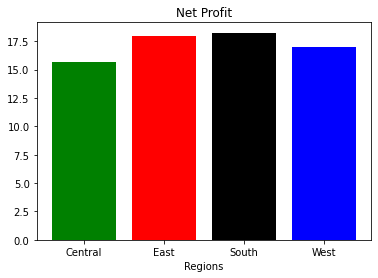

             Profit        Sales  New Profit
Region                                      
Central  17432.9569  111355.1762   15.655273
East     24910.9504  138598.2420   17.973497
South    15861.1758   86886.8560   18.254977
West     34698.5938  203667.2475   17.036904


In [46]:
# Net profit is calculated as the financial ratio percentage of profit a 
# company produces from its total Sales.
# Here we can conclude the regions where the profits are made

new_data = data.groupby(['Region']).sum()[['Profit','Sales']]
new_data['New Profit'] = (new_data['Profit']/new_data['Sales'])*100
plt.bar(new_data.index.values, new_data['New Profit'],color=['green','red','black','blue'])
plt.xlabel('Regions')
plt.title('Net Profit')
plt.show()
print(new_data)

##**Conclusion:** 

By Determining all columns and we are concluding that profit is decreasing with increasing discounts.

West Region has the highest profit and sales.

South Region has the lowest profit and sales but has the highest net marginal profit.

The Consumer segment purchases more quantity while home office segment purchases least quantity.

For the Ship Mode, the Standard Class is earning way much than the others with highest quantity and discount given.

Highest discount was provided to West side Region however it ranks the lowest in creating profit.

